<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Deep-Learning/blob/master/titanic_aits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Compare Support Vector Machines to a 3 layer Neural Networks on the titanic dataset 

In [0]:
import pandas as pd


### Downloading the dataset 

In [0]:
data=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

### Data analysis

In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


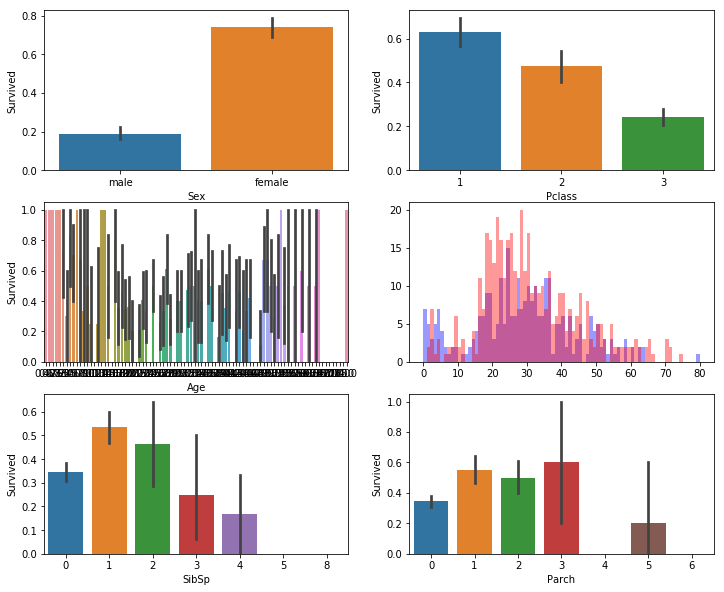

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
surv = data['Survived'] == 1
die = data['Survived'] == 0
plt.figure(figsize=[12,10])
plt.subplot(321)
sns.barplot('Sex','Survived',data = data)
plt.subplot(322)
sns.barplot('Pclass','Survived',data = data)
plt.subplot(323)
sns.barplot('Age','Survived',data = data)
plt.subplot(324)
sns.distplot(data[surv]['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(data[die]['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red')
plt.subplot(325)
sns.barplot('SibSp','Survived',data = data)
plt.subplot(326)
sns.barplot('Parch','Survived',data = data)

## Data preprocessing
### We need to convert all the non-numeric data into numeric data so that we can work on it.

#### Let us calculate how many NaN vaues are there in our dataset

In [0]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [0]:
data["Fare"]=data["Fare"].fillna(data["Fare"].dropna().median())
data["Age"]=data["Age"].fillna(data["Age"].dropna().median())


        ## converting sex data into numeric data: male=0,female=1
data.loc[data["Sex"]=="male","Sex"]=0
data.loc[data["Sex"]=="female","Sex"]=1


        ### converion embarking data to 0 for 'S', 1 for 'C',3 for 'Q'
data.loc[data["Embarked"]=="S","Embarked"]=0
data.loc[data["Embarked"]=="C","Embarked"]=1
data.loc[data["Embarked"]=="Q","Embarked"]=2

data['Embarked']=data['Embarked'].fillna(data['Embarked'].dropna().median())



In [0]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


In [0]:
test["Fare"]=data["Fare"].fillna(data["Fare"].dropna().median())
test["Age"]=data["Age"].fillna(data["Age"].dropna().median())


        ## converting sex data into numeric data: male=0,female=1
test.loc[test["Sex"]=="male","Sex"]=0
test.loc[test["Sex"]=="female","Sex"]=1


        ### converion embarking data to 0 for 'S', 1 for 'C',3 for 'Q'
test.loc[data["Embarked"]=="S","Embarked"]=0
test.loc[data["Embarked"]=="C","Embarked"]=1
test.loc[data["Embarked"]=="Q","Embarked"]=2

test['Embarked']=data['Embarked'].fillna(data['Embarked'].dropna().median())

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
X=data.drop(columns=['PassengerId', 'Cabin', 'Fare', 'Ticket', 'Name', 'Survived'])
y=data[['Survived']]


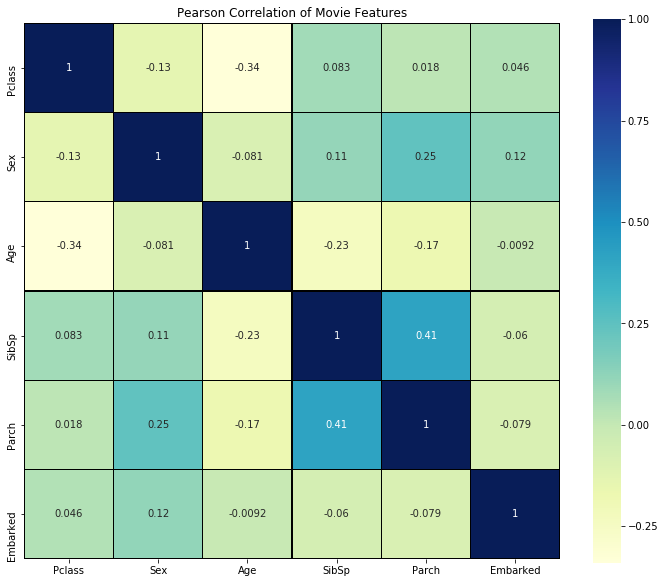

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(X.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [0]:
test=test.drop(columns=['PassengerId', 'Cabin', 'Fare', 'Ticket', 'Name'])

# SVM
### A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [0]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score

import warnings; warnings.simplefilter('ignore')

svc = SVC(C = 30, gamma = 0.01)
svc.fit(X,y) 


SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions = svc.predict(test)
print(predictions)

[0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


# 3 LAYER NEURAL NETWORK


In [0]:
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [0]:
n_cols=x_train.shape[1]
n_cols

6

In [0]:
from keras.utils import to_categorical

model=Sequential()

y_test= to_categorical(y_test)

model.add(Dense(6, activation='relu', input_shape=(n_cols,), use_bias=True))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
model.fit(X, y, validation_split=0.33, epochs=100, batch_size=10)





Train on 596 samples, validate on 295 samples
Epoch 1/100
596/596 [==============================] - 0s 570us/step - loss: 3.3175 - acc: 0.6174 - val_loss: 1.9811 - val_acc: 0.6576
Epoch 2/100
596/596 [==============================] - 0s 145us/step - loss: 1.3255 - acc: 0.6208 - val_loss: 0.7588 - val_acc: 0.6542
Epoch 3/100
596/596 [==============================] - 0s 150us/step - loss: 0.6853 - acc: 0.6225 - val_loss: 0.6819 - val_acc: 0.5831
Epoch 4/100
596/596 [==============================] - 0s 148us/step - loss: 0.6715 - acc: 0.6107 - val_loss: 0.6659 - val_acc: 0.6475
Epoch 5/100
596/596 [==============================] - 0s 151us/step - loss: 0.6666 - acc: 0.6275 - val_loss: 0.6623 - val_acc: 0.6780
Epoch 6/100
596/596 [==============================] - 0s 142us/step - loss: 0.6629 - acc: 0.6342 - val_loss: 0.6595 - val_acc: 0.6780
Epoch 7/100
596/596 [==============================] - 0s 144us/step - loss: 0.6598 - acc: 0.6376 - val_loss: 0.6560 - val_acc: 0.6814
Epoch 8/1

### Now we will be training whoe of the data to both SVM and Neural network

In [0]:
import numpy as np
NN=[]
for i in model.predict(test):
  if i>0.5:
    NN.append(1)
  else:
    NN.append(0)
print(np.array(NN))

[0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


### K-fold validation

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [0]:
def build_classifier():
  classifier=Sequential()
  n_cols=x_train.shape[1]
  classifier.add(Dense(5, init='uniform', activation='relu', input_shape=(n_cols,)))
  classifier.add(Dense(5, init='uniform', activation='relu'))
  classifier.add(Dense(1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return classifier
  

In [0]:
classifier=KerasClassifier(build_fn=build_classifier, batch_size=100, epochs=100)

In [0]:
accuracies=cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", input_shape=(8,), kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


Epoch 1/100
681/681 [==============================] - 1s 1ms/step - loss: 0.6873 - acc: 0.6285
Epoch 2/100
681/681 [==============================] - 0s 15us/step - loss: 0.6804 - acc: 0.6285
Epoch 3/100
681/681 [==============================] - 0s 16us/step - loss: 0.6734 - acc: 0.6285
Epoch 4/100
681/681 [==============================] - 0s 16us/step - loss: 0.6700 - acc: 0.6285
Epoch 5/100
681/681 [==============================] - 0s 18us/step - loss: 0.6680 - acc: 0.6285
Epoch 6/100
681/681 [==============================] - 0s 19us/step - loss: 0.6661 - acc: 0.6285
Epoch 7/100
681/681 [==============================] - 0s 21us/step - loss: 0.6639 - acc: 0.6285
Epoch 8/100
681/681 [==============================] - 0s 18us/step - loss: 0.6616 - acc: 0.6285
Epoch 9/100
681/681 [==============================] - 0s 18us/step - loss: 0.6591 - acc: 0.6285
Epoch 10/100
681/681 [==============================] - 0s 19us/step - loss: 0.6562 - acc: 0.6285
Epoch 11/100
681/681 [========

In [0]:
mean=accuracies.mean()
mean

0.7000000059604645

In [0]:

variance=accuracies.std()
variance

0.0495933601784354

In [0]:
y_hat=model.predict(x_test)>0.5

In [0]:
y_hat=model.predict(x_test)>0.5

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_hat)


In [0]:
cm

array([[63, 12],
       [17, 42]])

### HYPERTUNING

In [0]:
def build_classifier(optimizer):
  classifier=Sequential()
  n_cols=x_train.shape[1]
  classifier.add(Dense(5, init='uniform', activation='relu', input_shape=(n_cols,)))
  classifier.add(Dense(5, init='uniform', activation='relu'))
  classifier.add(Dense(1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

In [0]:
from sklearn.model_selection import GridSearchCV


In [0]:
classifier=KerasClassifier(build_fn=build_classifier)
parameters={'batch_size':[32, 64], 'epochs':[100,200,500], 'optimizer':['adam']}
grid_search=GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_serach=grid_search.fit(x_train, y_train)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", input_shape=(8,), kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


Epoch 1/100
681/681 [==============================] - 6s 9ms/step - loss: 0.6901 - acc: 0.5756
Epoch 2/100
681/681 [==============================] - 0s 151us/step - loss: 0.6792 - acc: 0.6138
Epoch 3/100
681/681 [==============================] - 0s 144us/step - loss: 0.6698 - acc: 0.6138
Epoch 4/100
681/681 [==============================] - 0s 135us/step - loss: 0.6676 - acc: 0.6138
Epoch 5/100
681/681 [==============================] - 0s 158us/step - loss: 0.6630 - acc: 0.6138
Epoch 6/100
681/681 [==============================] - 0s 137us/step - loss: 0.6591 - acc: 0.6138
Epoch 7/100
681/681 [==============================] - 0s 152us/step - loss: 0.6541 - acc: 0.6138
Epoch 8/100
681/681 [==============================] - 0s 137us/step - loss: 0.6486 - acc: 0.6153
Epoch 9/100
681/681 [==============================] - 0s 139us/step - loss: 0.6416 - acc: 0.6432
Epoch 10/100
681/681 [==============================] - 0s 138us/step - loss: 0.6341 - acc: 0.6505
Epoch 11/100
681/681 

In [0]:
best_params=grid_search.best_params_

In [0]:
best_params

{'batch_size': 32, 'epochs': 500}

In [0]:
best_params

{'batch_size': 32, 'epochs': 500}

In [0]:
best_accuracy=grid_search.best_score_

In [0]:
best_accuracy

0.7965653896961691